In [22]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

from yellowbrick.target import FeatureCorrelation
import plotly.express as px

from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
from dotenv import load_dotenv
import os
import requests
import base64

In [24]:
spotify_df = pd.read_csv('/Users/anikasethi/Desktop/train_dataset.csv')
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
# change release_date to just the year
spotify_df['release_year'] = spotify_df['release_date'].apply(lambda x: int(str(x)[:4]))

# normalize and make a new normalized df
features = ['popularity', 'danceability', 'energy', 'tempo', 'valence', 
            'acousticness', 'liveness', 'instrumentalness', 'time_signature', 'key']

X = spotify_df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

spotify_normalized_df = spotify_df.copy()
spotify_normalized_df[features] = X_scaled
spotify_normalized_df.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,-1.174160,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.490096,-0.385182,...,-13.338,1,0.4510,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,-1.500768,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.791115,-1.107625,...,-22.136,1,0.9570,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,-1.500768,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-0.780204,-1.449000,...,-21.180,1,0.0512,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,-1.500768,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,-1.460507,-1.776084,...,-27.961,1,0.0504,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,-1.500768,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,-0.972856,-1.524420,...,-16.900,0,0.0390,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599,1922


In [19]:
spotify_normalized_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'release_year',
       'decade', 'cluster', 'pca_1', 'pca_2'],
      dtype='object')

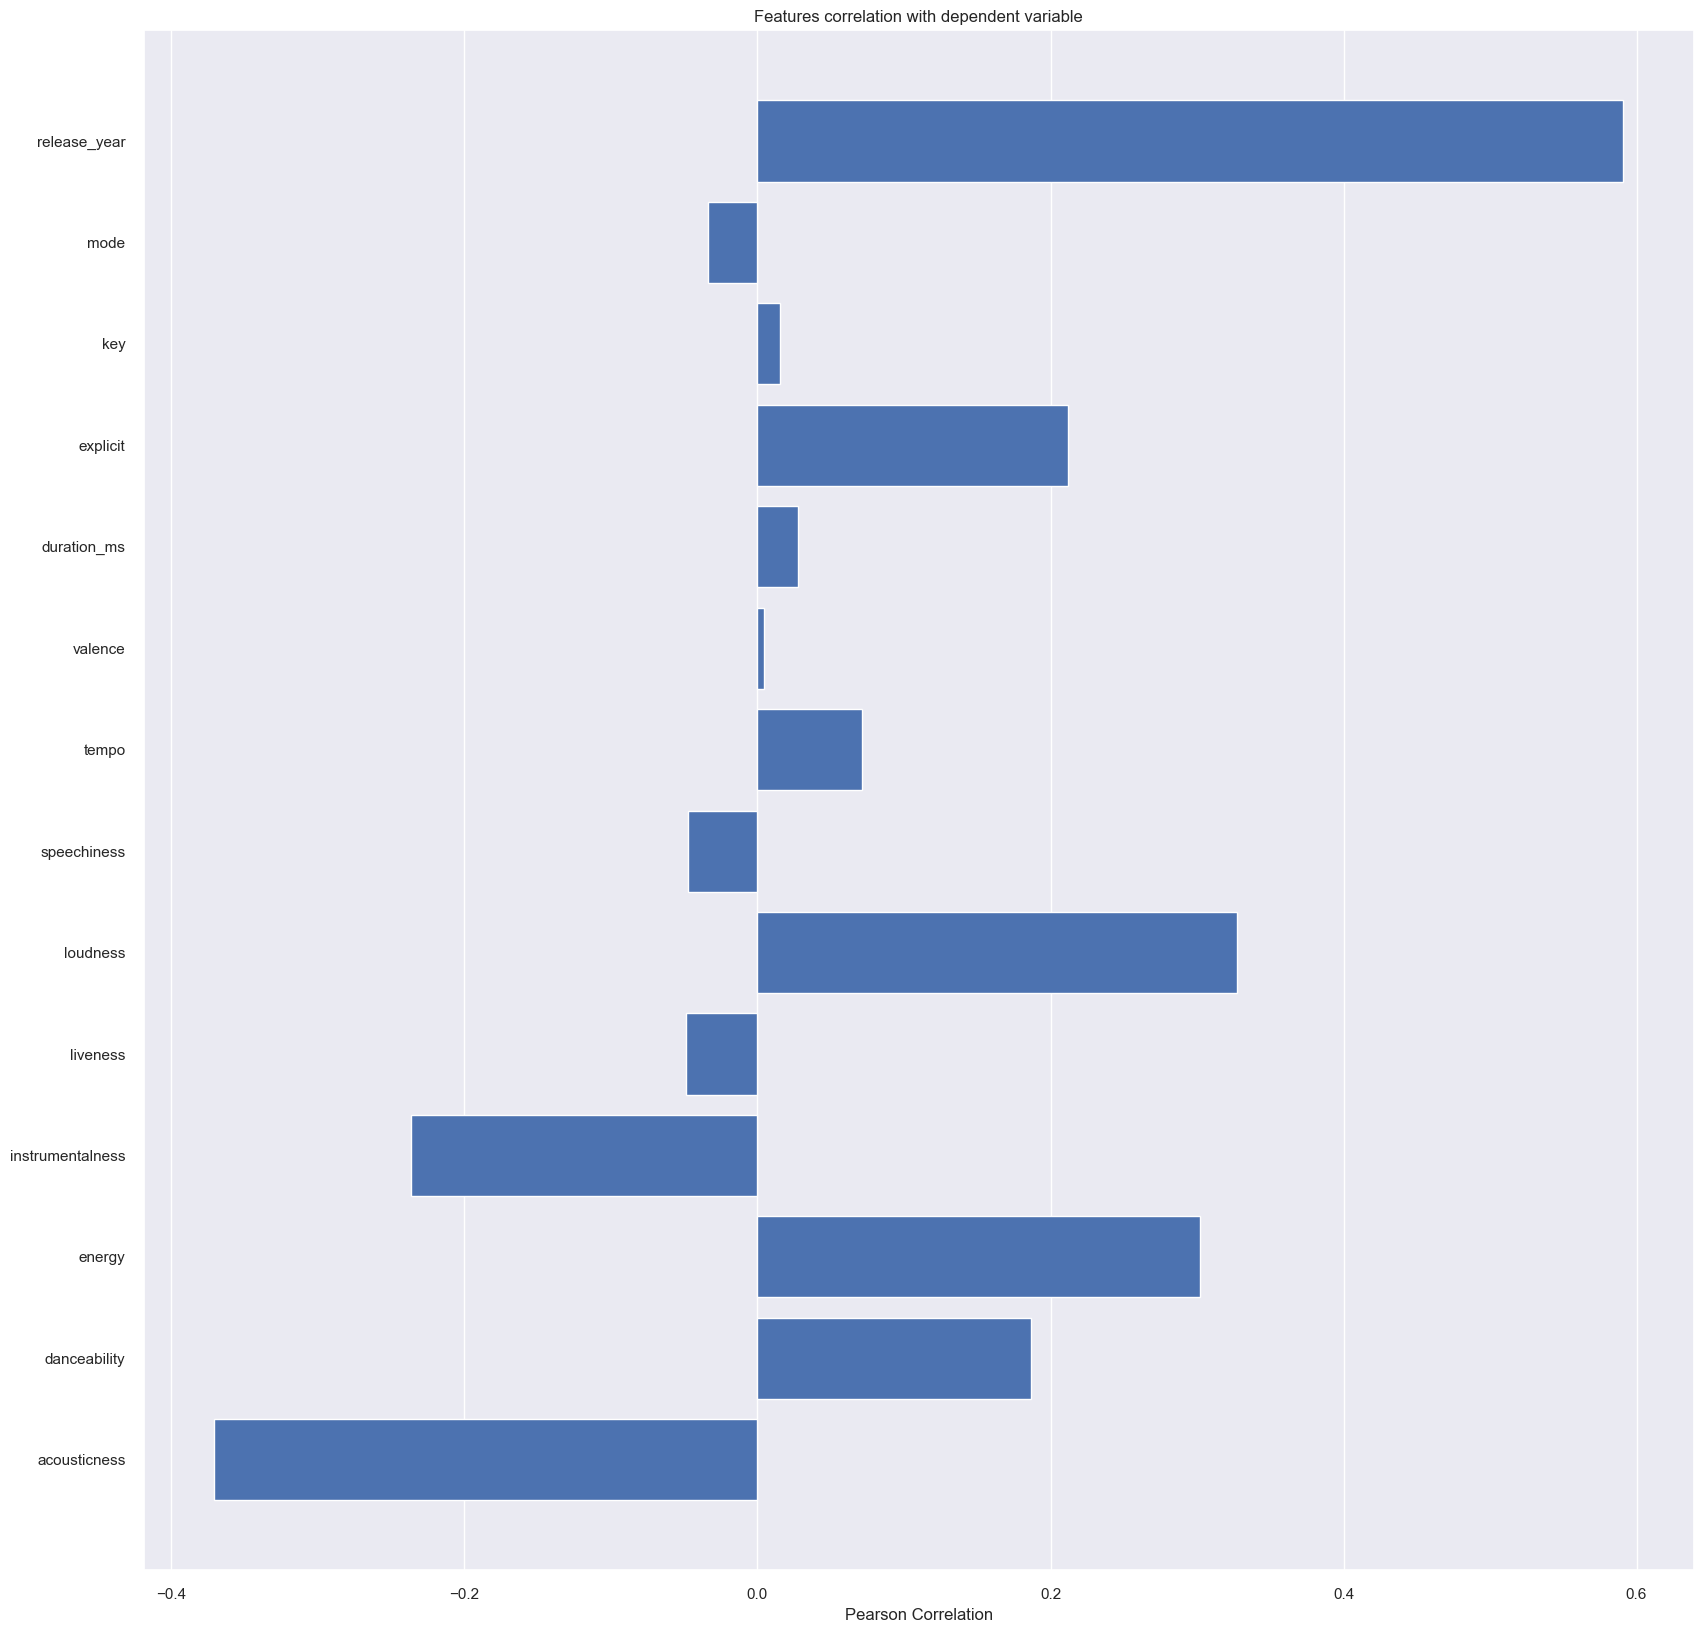

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
# visualizing dataset, seeing patterns in it: GRAPH #1
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode', 'release_year']

X, y = spotify_df[feature_names], spotify_df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

<Axes: xlabel='decade', ylabel='count'>

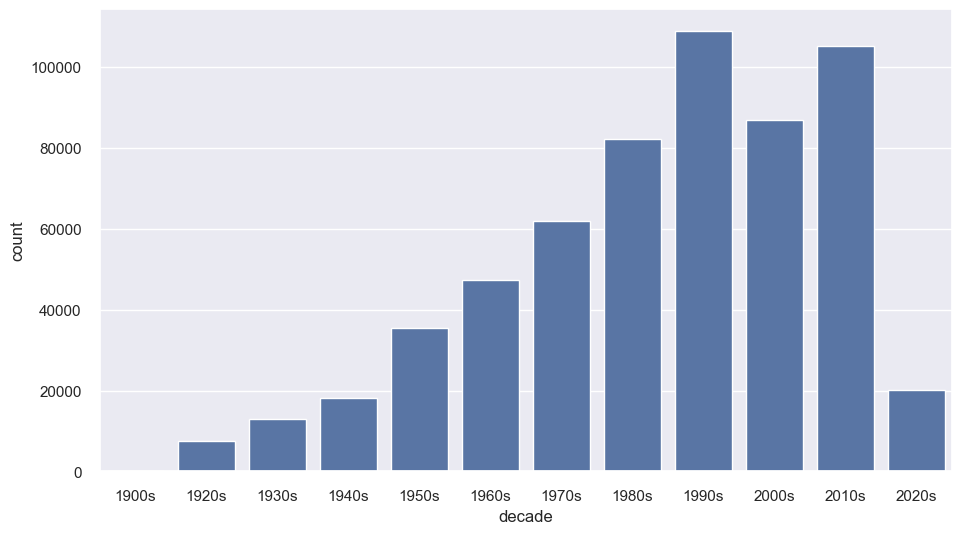

In [ ]:
# visualizing dataset, seeing patterns in it: GRAPH #2
def get_decade(year):
    period_start = int(year / 10) * 10
    decade = '{}s'.format(period_start)
    return decade

spotify_normalized_df['decade'] = spotify_normalized_df['release_year'].apply(get_decade)
sorted_decades = sorted(spotify_normalized_df['decade'].unique())
spotify_normalized_df['decade'] = pd.Categorical(spotify_normalized_df['decade'], categories=sorted_decades, ordered=True)

sns.set_theme(rc={'figure.figsize': (11, 6)})
sns.countplot(data=spotify_normalized_df, x='decade', order=sorted_decades)

In [ ]:
# visualizing dataset, seeing patterns in it: GRAPH #3
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
year_data = spotify_normalized_df.groupby('release_year')[sound_features].mean().reset_index()

fig = px.line(year_data, x='release_year', y=sound_features, 
              labels={'release_year': 'Year', 'value': 'Feature Value'}, 
              title='Trend of Sound Features Over Time')

fig.show()

In [58]:
# K-Means Clustering
clustering_features = [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 
    'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
    'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]


In [57]:
X = spotify_normalized_df[clustering_features]
X.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-1.174160,126903,0,0.490096,-0.385182,-1.483654,-13.338,1,0.4510,0.642528,2.362779,-0.341434,-1.650527,-0.457392,-1.845842
1,-1.500768,98200,0,0.791115,-1.107625,-1.483654,-22.136,1,0.9570,0.995129,-0.425120,-0.357710,0.398600,-0.552876,-6.072724
2,-1.500768,181640,0,-0.780204,-1.449000,-1.199517,-21.180,1,0.0512,1.559864,-0.343432,-0.010498,-0.369823,0.401596,2.381040
3,-1.500768,176907,0,-1.460507,-1.776084,0.505310,-27.961,1,0.0504,1.562730,3.014787,-0.596418,-0.602678,1.730782,-1.845842
4,-1.500768,163080,0,-0.972856,-1.524420,-0.631241,-16.900,0,0.0390,1.545530,0.062013,0.526596,-1.382743,-0.512190,0.267599


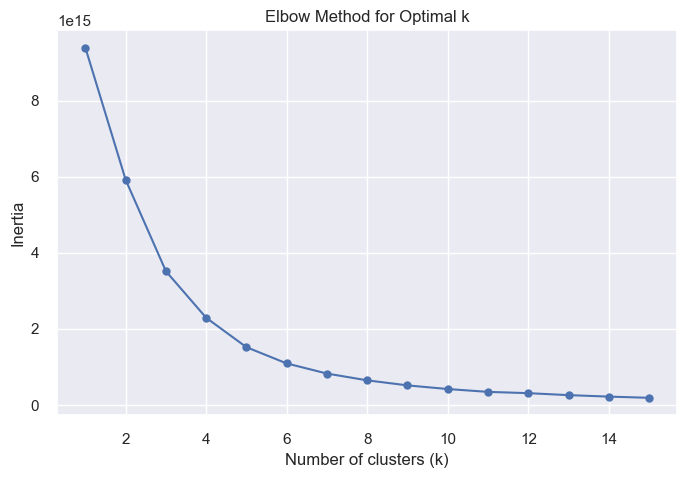

In [ ]:
# Elbow method to see best amount of clusters
inertia = []
K = range(1, 16)  # test sizes 1-15

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# going to use k = 5


In [ ]:
# actual k means cluser
optimal_k = 5 # couldalso be 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
spotify_normalized_df['cluster'] = kmeans.fit_predict(X)

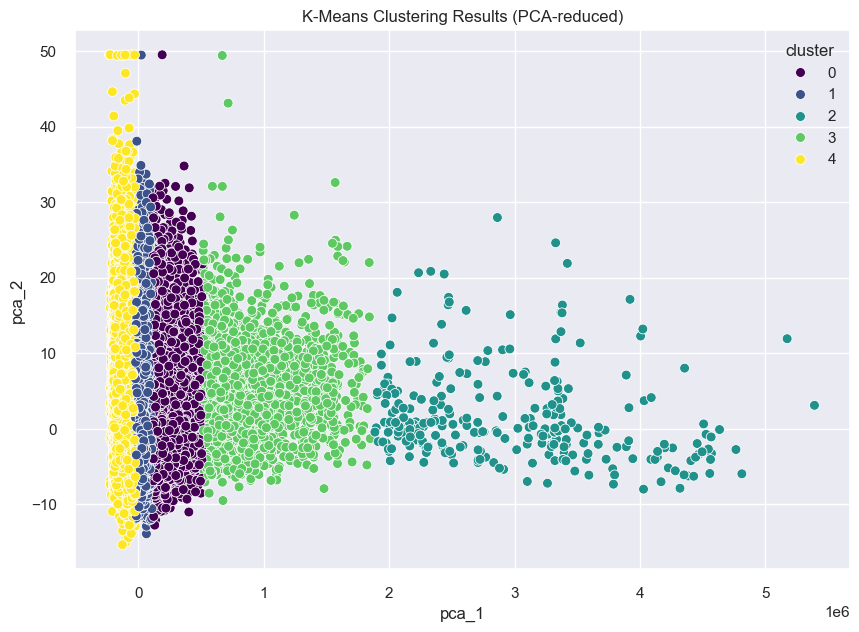

In [60]:
# visualize cluster
# rec dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

spotify_normalized_df['pca_1'] = X_pca[:, 0]
spotify_normalized_df['pca_2'] = X_pca[:, 1]

# plot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=spotify_normalized_df, x='pca_1', y='pca_2', hue='cluster', palette='viridis', s=50)
plt.title('K-Means Clustering Results (PCA-reduced)')
plt.show()

In [51]:
# take any set of songs from the test dataset and try and generate a recommended playlist from it
spotify_df_test = pd.read_csv('/Users/anikasethi/Desktop/test_dataset.csv')
spotify_df_test['explicit'] = spotify_df_test['explicit'].map({True: 1, False: 0})
spotify_df_test.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
spotify_df_test.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
# Align test dataset features with training features
# Ensure the test dataset has only the required features in the correct order
spotify_df_test_aligned = spotify_df_test[clustering_features].copy()
spotify_df_test_aligned.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [62]:
# Transform using the trained scaler
spotify_df_test_scaled = scaler.transform(spotify_df_test_aligned)

# Predict clusters using the trained K-Means model
spotify_df_test['cluster'] = kmeans.predict(spotify_df_test_scaled)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- duration_ms
- explicit
- loudness
- mode
- speechiness


In [61]:
# Specify 10 songs by their indices or IDs
selected_song_ids = ['6Im9k8u9iIzKMrmV7BWtlF', '78qd8dvwea0Gosb6Fe6j3k', '44ONERBHALxftQNWq6dmyd', '0z8hI3OPS8ADPWtoCjjLl6', '3zkWCteF82vJwv0hRLba76', 
                     '08AVok9laWpSSpX42guJ2K', '6K9UYBSvkOadWYO5nUrfVP', '2m6Ko3CY1qXNNja8AlugNc', '0Y9PqGjKgupH5fKbrgDQUr', '3bCp61o3h46Yvr0vgMJlaL']

# Filter the dataset to get the selected songs
selected_songs = spotify_df_test[spotify_df_test['track_id'].isin(selected_song_ids)]
selected_clusters = selected_songs['cluster'].unique()

KeyError: 'cluster'

In [ ]:
# Find similar songs in the same clusters
recommended_songs = spotify_df_test[spotify_df_test['cluster'].isin(selected_clusters)].copy()

# Calculate distances to centroids for ranking
from sklearn.metrics.pairwise import euclidean_distances

recommended_songs['distance_to_centroid'] = recommended_songs.apply(
    lambda row: euclidean_distances([row[test_features]], [kmeans.cluster_centers_[row['cluster']]])[0][0],
    axis=1
)

# Exclude the selected songs from recommendations
recommended_songs = recommended_songs[~recommended_songs.index.isin(selected_songs.index)]
recommended_songs = recommended_songs.sort_values('distance_to_centroid').head(20)

# Output the recommended playlist
playlist = recommended_songs[['track_name', 'artists', 'album_name', 'cluster', 'distance_to_centroid']]
print(playlist)